In [1]:
import os
import shutil
import glob
import numpy as np
import tensorflow as tf
from tensorflow import keras
import tensorflow.keras.preprocessing.image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from skimage.filters import laplace
from skimage import io
import skimage
%matplotlib inline
import cv2

In [2]:
DATA_PATH = 'Concrete'
category = os.listdir(DATA_PATH)
category

['Negative', 'Positive']

In [3]:
def laplace_filter(img):
    return laplace(img)

In [4]:
def gaus(img):
    return (skimage.filters.gaussian(img,sigma=1,multichannel=False))

In [5]:
from skimage import data
from skimage import exposure
def exp(img):
    return skimage.exposure.adjust_gamma(img,1,11)

In [6]:
def our_preprocess(img):
     
    
    #img1 = gray(img)
    img1 = exp(img)
    img2 = gaus(img1)
    img3 = laplace_filter(img2)
    #img3 = sobel(img2)
   
    
    return img3

In [7]:
x = x/255
x = our_preprocess(image)
plt.imshow(x)
plt.show()

NameError: name 'x' is not defined

In [8]:
img_size = 128
batch_size =256

In [9]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=our_preprocess,cval=20,fill_mode='constant',vertical_flip=True,rotation_range=45,horizontal_flip=True,rescale=1./255,validation_split=0.2)

In [10]:
#test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,validation_split=0.2,preprocessing_function=our_preprocess)

In [11]:
train_d=datagen.flow_from_directory(DATA_PATH,subset="training",
                                                    class_mode ='categorical',seed = 123,batch_size=batch_size,target_size=(img_size,img_size),shuffle=True)

Found 32000 images belonging to 2 classes.


In [12]:
test_d=datagen.flow_from_directory(DATA_PATH,subset="validation",
                                                    class_mode ='categorical',seed = 123,batch_size=batch_size,target_size =(img_size,img_size),shuffle=True,)

Found 8000 images belonging to 2 classes.


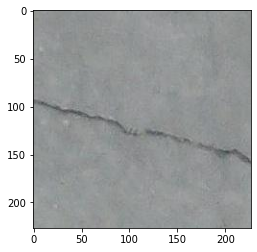

In [13]:
con_path = os.path.join(DATA_PATH,category[1],'*')
con_path = glob.glob(con_path)

image = io.imread(con_path[20])
plt.imshow(image)

In [14]:
image.shape

(227, 227, 3)

In [15]:
x1 =image.reshape(1,227,227,3)

In [16]:
x1.shape

(1, 227, 227, 3)

In [17]:
pwd

'D:\\Machine learning Aieducator\\ML_course\\Python_for_everybody\\Concrete_Project'

In [18]:
path = r'D:\\Machine learning Aieducator\\ML_course\\Python_for_everybody\\cracks'

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


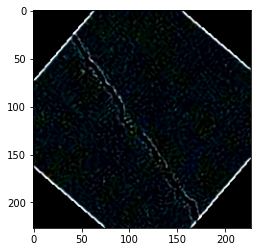

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


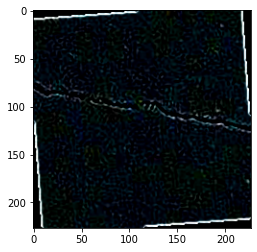

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


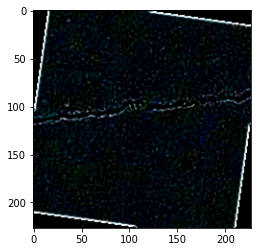

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


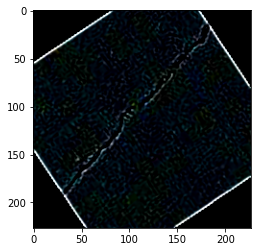

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


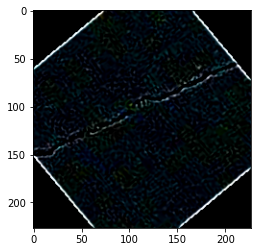

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


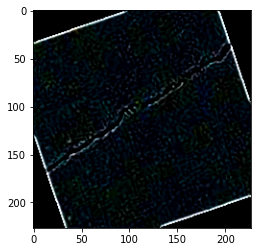

In [19]:
i=0
for batch in datagen.flow(x1,batch_size=1,save_to_dir=path,save_prefix='crack img',save_format='png'):
    i=i+1
    plt.imshow(batch[0])
    plt.show()
    if i>5:
        break

In [20]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import ResNet50,DenseNet201
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D,GlobalAveragePooling2D,Dense,Activation,Flatten,Dropout,Input,MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras import optimizers

In [4770]:
#VGG16
"""
num_classes = 2
def get_model():
    base_model = VGG16(weights='imagenet',include_top = False,
                       input_tensor=Input(shape=(img_size,img_size,3)))
    
    for layer in base_model.layers:
        layer.trainable =False
        
    base_model_output = base_model.output   
    

    x = Flatten(name ='flatten')(base_model_output)
    
    x = Dense(64,activation ='relu')(x)
    x = Dropout(0.25)(x)
   
    x = Dense(128,activation='relu')(x)
    x = Dropout(0.25)(x)
    
    x = Dense(256,activation ='relu')(x)
    x = Dropout(0.25)(x)
    
    x = Dense(512,activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(num_classes,activation ='softmax',name ='fnew')(x)
    
    model = Model(inputs = base_model.input,outputs = x)
    
    return model    
"""    

In [6378]:
"""
num_classes =2

model = Sequential()

model.add(Conv2D(32,(3,3),padding ='same',input_shape =(128,128,3),activation ='relu'))
model.add(Conv2D(32,(3,3),activation ='relu',padding='same'))
model.add(MaxPooling2D(pool_size =(2,2)))


model.add(Conv2D(64,(3,3),padding ='same',activation ='relu'))
model.add(Conv2D(64,(3,3),padding ='same',activation ='relu'))
model.add(MaxPooling2D(pool_size =(2,2)))


model.add(Conv2D(128,(3,3),padding ='same',activation ='relu'))
model.add(Conv2D(128,(3,3),padding = 'same',activation ='relu'))
model.add(MaxPooling2D(pool_size =(2,2)))


model.add(Conv2D(256,(3,3),padding ='same',activation ='relu'))
model.add(Conv2D(256,(3,3),padding = 'same',activation ='relu'))
model.add(MaxPooling2D(pool_size =(2,2)))


model.add(Flatten())
model.add(Dense(512,activation ='relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes,activation ='softmax'))

"""

In [21]:
#ResNet50

num_classes = 2
def get_model():
    base_model = DenseNet201(weights='imagenet',include_top = False,
                       input_shape=(128,128,3))
    
    for layer in base_model.layers:
        layer.trainable =False
        
    base_model_output = base_model.output   
    

    x = Flatten(name ='flatten')(base_model_output)
    
    
    
    x = Dense(512,activation='relu')(x)
    x = Dense(num_classes,activation ='softmax',name ='fnew')(x)
    
    model = Model(inputs = base_model.input,outputs = x)
    
    return model 


In [22]:
model = get_model()

74842112/74836368 [==============================] - 3s 0us/step


In [23]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 134, 134, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 64, 64, 64)   9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 64, 64, 64)   256         conv1/conv[0][0]                 
______________________________________________________________________________________________

In [24]:
model.compile(loss = 'categorical_crossentropy',optimizer = 'SGD',metrics =['accuracy'])

In [25]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 134, 134, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 64, 64, 64)   9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 64, 64, 64)   256         conv1/conv[0][0]                 
______________________________________________________________________________________________

__________________________________________________________________________________________________
conv5_block29_1_relu (Activatio (None, 4, 4, 128)    0           conv5_block29_1_bn[0][0]         
__________________________________________________________________________________________________
conv5_block29_2_conv (Conv2D)   (None, 4, 4, 32)     36864       conv5_block29_1_relu[0][0]       
__________________________________________________________________________________________________
conv5_block29_concat (Concatena (None, 4, 4, 1824)   0           conv5_block28_concat[0][0]       
                                                                 conv5_block29_2_conv[0][0]       
__________________________________________________________________________________________________
conv5_block30_0_bn (BatchNormal (None, 4, 4, 1824)   7296        conv5_block29_concat[0][0]       
__________________________________________________________________________________________________
conv5_bloc

In [27]:

#epochs = 5

#model.fit(train_d,steps_per_epoch=train_d.n//batch_size,validation_data=test_d,
                    #validation_steps=test_d.n//batch_size,epochs = epochs,verbose =1)

In [26]:
epochs = 10
result = model.fit(train_d,batch_size=batch_size,epochs = epochs,verbose =1)


Epoch 1/10
125/125 [==============================] - 285s 2s/step - loss: 0.3693 - accuracy: 0.9488
Epoch 2/10
125/125 [==============================] - 183s 1s/step - loss: 0.0261 - accuracy: 0.9923
Epoch 3/10
125/125 [==============================] - 198s 2s/step - loss: 0.0216 - accuracy: 0.9937
Epoch 4/10
125/125 [==============================] - 196s 2s/step - loss: 0.0184 - accuracy: 0.9941
Epoch 5/10
125/125 [==============================] - 191s 2s/step - loss: 0.0175 - accuracy: 0.9945
Epoch 6/10
125/125 [==============================] - 192s 2s/step - loss: 0.0164 - accuracy: 0.9944
Epoch 7/10
125/125 [==============================] - 184s 1s/step - loss: 0.0164 - accuracy: 0.9944
Epoch 8/10
125/125 [==============================] - 218s 2s/step - loss: 0.0144 - accuracy: 0.9952
Epoch 9/10
125/125 [==============================] - 240s 2s/step - loss: 0.0152 - accuracy: 0.9952
Epoch 10/10
125/125 [==============================] - 186s 1s/step - loss: 0.0136 - accura

In [27]:
loss,acc = model.evaluate(test_d)

32/32 [==============================] - 73s 2s/step - loss: 0.0140 - accuracy: 0.9956


In [28]:
print(acc)

0.9956250190734863


In [68]:
model.save('Concrete_Crack.h5')

In [30]:
prediction = model.predict(test_d,batch_size=10,verbose=0)

In [33]:
print(prediction.round())

[[1. 0.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [0. 1.]
 [0. 1.]]


In [59]:
sam = 'Concrete/Negative//00003.jpg'

In [60]:
def prepare(filepath):
    img_array = cv2.imread(filepath)
    img_array = img_array / 255
    img_array = our_preprocess(img_array)
    new_array = cv2.resize(img_array, (128,128))
    return new_array.reshape(-1,128,128,3)

In [61]:
prediction = model.predict([prepare(sam)])
p=np.argmax(prediction)

In [62]:
print(prediction)

[[0.9437735  0.05622656]]


In [63]:
p

0